Following along the book on Complex Network Analysis (CNA), using the Python libraries NetworkX, iGraph, graph-tool, 
Zinoviev, Dmitry: Complex Network Analysis in Python. Recognize, Construct, Visualize, Analyse, Interpret. Version P1.0 (2018)

Since the release of the book, NetworkX has been migrated from v1.0 to v2.0 / v2.1 (July 2018) and some of the functions do not exist any longer - here's a migration guide https://networkx.github.io/documentation/stable/release/migration_guide_from_1.x_to_2.0.html

There's the full documentation of NetworkX v2.1 in pdf (666 pages) here https://networkx.github.io/documentation/stable/_downloads/networkx_reference.pdf

In [1]:
import networkx as nx

In [2]:
G = nx.Graph([("A", "eggs"),])
G.add_node("spinach") # add a single node
G.add_node("Hg") # add a single node by mistake
G.add_nodes_from(["folates", "asparagus", "liver"]) # add a list of nodes
G.add_edge("spinach", "folates") # add one edge, both ends exist
G.add_edge("spinach", "heating oil") # add one edge by mistake
G.add_edge("liver", "Se") # add one edge, one end does not exist
G.add_edges_from([("folates", "liver"), ("folates", "asparagus")]) # add list of edges

In [3]:
G.remove_node("Hg") # removes this node
G.remove_nodes_from(["Hg",]) # removes a missing node from a list
G.remove_edge("spinach", "heating oil") # removes edge between these nodes
G.remove_edges_from([("spinach", "heating oil"),]) # removes edges from a list
G.remove_node("heating oil") # not removed yet (?????)

In [4]:
# use G.clear to delete all graph nodes and edges at once but keep the graph shell

In [5]:
print(G.node)
# this returns a node list in v2.1 instead of an attribute dictionary (that is empty)
# prior to v2.1 returning a node list was done with print(G.nodes) and print(G.edges) respectively
dict(G.nodes)

['A', 'eggs', 'spinach', 'folates', 'asparagus', 'liver', 'Se']


{'A': {},
 'eggs': {},
 'spinach': {},
 'folates': {},
 'asparagus': {},
 'liver': {},
 'Se': {}}

In [6]:
# by the way: G = nx.Graph() creates an empty undirected graph (i.e. we name it / assign the variable "G")
# G = nx.DiGraph() creates an empty directed graph - many NetworkX algorithms refuse to work with directed graphs,
# but they can be convertet into undirected graphs F = nx.Graph(G) - but those two are not the same thing!
# multigraphs are like undirected graphs but they can have multiple, parallel edges between the same nodes G = nx.MultiGraph()
# there's also directed multigraphs G = nx.MultiDiGraph()

In [7]:
print(G.adj)
# since NetworkX v2.1 way of displaying attributes of edges ('dictionary'),
# before it was print(G.edge) which now triggers an error
dict(G.edges)

{'A': {'eggs': {}}, 'eggs': {'A': {}}, 'spinach': {'folates': {}}, 'folates': {'spinach': {}, 'liver': {}, 'asparagus': {}}, 'asparagus': {'folates': {}}, 'liver': {'Se': {}, 'folates': {}}, 'Se': {'liver': {}}}


{('A', 'eggs'): {},
 ('spinach', 'folates'): {},
 ('folates', 'liver'): {},
 ('folates', 'asparagus'): {},
 ('liver', 'Se'): {}}

In [8]:
print(G.nodes())
# node list

['A', 'eggs', 'spinach', 'folates', 'asparagus', 'liver', 'Se']


In [9]:
print(G.edges())
# edge list

[('A', 'eggs'), ('spinach', 'folates'), ('folates', 'liver'), ('folates', 'asparagus'), ('liver', 'Se')]


In [10]:
print(G.nodes(data=True))

[('A', {}), ('eggs', {}), ('spinach', {}), ('folates', {}), ('asparagus', {}), ('liver', {}), ('Se', {})]


In [11]:
len(G)

7

In [12]:
print(G.edges(data=True))

[('A', 'eggs', {}), ('spinach', 'folates', {}), ('folates', 'liver', {}), ('folates', 'asparagus', {}), ('liver', 'Se', {})]


In [13]:
import csv
# imports the library csv for reading and writing .csv files in Python
import matplotlib.pyplot as plt
# visualisation library for the graphs
# import dzcnapy_plotlib as dzcnapy
# some personal library especially for this here book (cannot be found, install somehow?)

In [14]:
with open("data/nutrients.csv") as infile: # has to be adjusted depending on where the file is stored
    csv_reader = csv.reader(infile)
    G = nx.Graph(csv_reader)
print(G.nodes())

['A', 'carrots', 'eggs', 'fatty fish', 'green leafy vegs', 'liver', 'milk', 'tomatoes', 'B12', 'B6', 'asparagus', 'beans', 'kidneys', 'potatoes', 'C', 'pumpkins', 'Ca', 'broccoli', 'cheese', 'Cu', 'nuts', 'whole grains', 'D', 'mushrooms', 'E', 'seeds', 'Mn', 'legumes', 'wheat', 'Se', 'Zn', 'beef', 'riboflavin', 'niacin', 'folates', 'spinach', 'poultry', 'shellfish', 'thiamin', 'veg oils', 'yogurt']


In [15]:
# there's a part of the chapter where there's a selfloop 'hidden' in the nodes list above
# that is supposed to be detected with G.selfloop_edges() and removed with G.remove_edges_from
# the code should look like this:
# loops = G.selfloop_edges()
# G.remove_edges_from(loops)
# print(loops)
# and should return [('tomatoes', 'tomatoes')]
# then checked with running the code again
# loops = G.selfloop_edges()
# print(loops)
# []
# however, I cannot make it work, since the function has been removed with NetworkX v2.1 and substituted with
# nx.selfloop_edges(G) - moving it into a different class
# but I cannot make it work with that function either, instead there's an error message
# <generator object selfloop_edges.<locals>.<genexpr> at 0x0000021970AD64C0>
# haven't found out what to do about it and how to fix it!

### Re-labeling nodes (uppercase instead of lowercase) using nx.relabel_nodes()

In [16]:
mapping = {node: node.title() for node
          in G if isinstance(node, str)}
nx.relabel_nodes(G, mapping, copy=False)
print(G.nodes())
# it works! marvelous!! I have no idea what exactly he does here, though

['A', 'B12', 'B6', 'C', 'Ca', 'Cu', 'D', 'E', 'Mn', 'Se', 'Zn', 'Carrots', 'Eggs', 'Fatty Fish', 'Green Leafy Vegs', 'Liver', 'Milk', 'Tomatoes', 'Asparagus', 'Beans', 'Kidneys', 'Potatoes', 'Pumpkins', 'Broccoli', 'Cheese', 'Nuts', 'Whole Grains', 'Mushrooms', 'Seeds', 'Legumes', 'Wheat', 'Beef', 'Riboflavin', 'Niacin', 'Folates', 'Spinach', 'Poultry', 'Shellfish', 'Thiamin', 'Veg Oils', 'Yogurt']


In [17]:
print(G["Zn"])
# prints all nodes that share a connection with "Zn"

{'Liver': {}, 'Beans': {}, 'Kidneys': {}, 'Potatoes': {}, 'Nuts': {}, 'Beef': {}, 'Poultry': {}}


### Adding attributes to nodes and edges
The book says "an attribute is implemented as a dictionary associated with the node or edge. The dictionary keys are attribute names. As such, they must be immutable: int, float, bool, str, and so on. There are no limitations on the values."

In [18]:
# attributes can be defined while adding nodes or edges
G.add_node("Honey", edible=True)
G.add_nodes_from([("Steel", {"edible"  : False}), ]) # attention to the syntax here!!
G.add_edge("Honey", "Steel", weight=0.0)
G.add_edges_from([("Honey", "Zn"),], related=False)

In [19]:
# the edge attribute "weight" is used in NetworkX and other CNA libraries consistently to denote edge strength.
# graphs using this attribute are called weighted graphs
# there's a method for adding weighted graphs:
G.add_weighted_edges_from([("Honey", "Zn", 0.01), ("Honey", "Sugar", 0.99)])
# when adding several edges with this function, only one set of attributes can be set for all of them

In [20]:
G.nodes["Zn"]["nutrient"] = True # Zink is a nutrient

In [21]:
G.edges["Zn", "Beef"]["weight"] = 0.95 # Zink and Beef are well connected (high weight)
# attention! the functions G.node and G.edge have been migrated to G.nodes[n] and G.edges[u, v] in NetworkX v2.1

In [22]:
# removing unwanted attributes for nodes:
del G.nodes["Zn"]["nutrient"]

In [23]:
# removing unwanted attributes for edges:
del G.edges["Zn", "Beef"]["weight"]

Create a boolean attribute ("True" / "False") for all nutrients, called "nutrient"

In [24]:
nutrients = set(("B12", "Zn", "D", "B6", "A", "Se", "Cu", "Folates", "Ca", "Mn", "Thiamin", "Riboflavin", "C", "E", "Niacin"))
nutrient_dict = {node: (node in nutrients) for node in G}
nx.set_node_attributes(G, nutrient_dict, "nutrient")
# attention: in NetworkX v2.1 the order of the argument in () has changed from (graph, name, value) to (graph, value, name=None)
# name=None allows for name to be ommitted completely

In [25]:
print(G.nodes(data=True))
# prints the boolean attribute for all nodes,
# not only the ones where the attribute "nutrients" is True (which I think is counter-intuitive)

[('A', {'nutrient': True}), ('B12', {'nutrient': True}), ('B6', {'nutrient': True}), ('C', {'nutrient': True}), ('Ca', {'nutrient': True}), ('Cu', {'nutrient': True}), ('D', {'nutrient': True}), ('E', {'nutrient': True}), ('Mn', {'nutrient': True}), ('Se', {'nutrient': True}), ('Zn', {'nutrient': True}), ('Carrots', {'nutrient': False}), ('Eggs', {'nutrient': False}), ('Fatty Fish', {'nutrient': False}), ('Green Leafy Vegs', {'nutrient': False}), ('Liver', {'nutrient': False}), ('Milk', {'nutrient': False}), ('Tomatoes', {'nutrient': False}), ('Asparagus', {'nutrient': False}), ('Beans', {'nutrient': False}), ('Kidneys', {'nutrient': False}), ('Potatoes', {'nutrient': False}), ('Pumpkins', {'nutrient': False}), ('Broccoli', {'nutrient': False}), ('Cheese', {'nutrient': False}), ('Nuts', {'nutrient': False}), ('Whole Grains', {'nutrient': False}), ('Mushrooms', {'nutrient': False}), ('Seeds', {'nutrient': False}), ('Legumes', {'nutrient': False}), ('Wheat', {'nutrient': False}), ('Beef'

## Visualizing a Network with Matplotlib
Why? NetworkX doesn't do visualization, but the matplotlib.pyplot library can be used for this

In [26]:
import matplotlib.pyplot as plt

There's a couple of different layouts for network graph visualisations:

Random layout --- randomly; requires NumPy library --- pos=nx.random_layout --- nx.draw_randon

Circular layout --- on a circle --- pos=nx.circular_layout --- nx.draw_circular

Shell layout --- on concentric circles defined by nlist --- pos=nx.shell_layout(G, nlist=None) --- nx.draw_shell

Spectral layout --- based on eigenvector centrality values --- pos=nx.spectral_layout --- nx.draw_spectral

Force-directed layout --- "balls connected with springs" --- pos=nx.frucherman_reingold_layout --- nx.draw_networkx

Force-directed layout (alternative) --- pos=nx.spring_layout --- nx.draw_spring


The books says, "at the rendering phase, NetworkX draws the nodes, labels, and edges at the prescribed positions, using the default or specified shapes, fonts, and colors. You can see the graphical output on the screen, save it into a file (PNG, PDF, PostScript, EPS, SVG), or both. First save the image, then display it."

In [27]:
import dzcnapy_plotlib as dzcnapy #--- ok, what happens here is that I can import a custom library as long as it lives
# in the same directory as the notebook is running in
# preparation for drawing
colors = ["yellow" if n[1]["nutrient"] else "pink" for n in G.nodes(data=True)]
dzcnapy.medium_attrs["node_color"] = colors

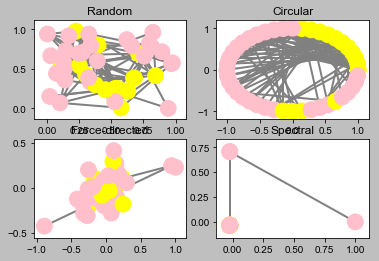

In [28]:
_, plot = plt.subplots(2, 2)
subplots = plot.reshape(1, 4)[0]
layouts = (nx.random_layout, nx.circular_layout, nx.spring_layout, nx.spectral_layout)
titles = ("Random", "Circular", "Force-directed", "Spectral")
for plot, layout, title in zip(subplots, layouts, titles):
    pos = layout(G)
    nx.draw_networkx(G, pos=pos, ax=plot, with_labels=False,
                    **dzcnapy.medium_attrs)
    plot.set_title(title)

In [29]:
# when not using the dzcnapy plot library, the viz looks horrible;
# I don't know how to sensibly reshape the visualisations here and do not fully understand what happens in the cell above

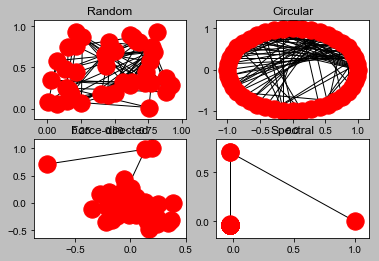

In [30]:
# now the same as above without the dzcnapy plot library
_, plot = plt.subplots(2, 2)
subplots = plot.reshape(1, 4)[0]
layouts = (nx.random_layout, nx.circular_layout, nx.spring_layout, nx.spectral_layout)
titles = ("Random", "Circular", "Force-directed", "Spectral")
for plot, layout, title in zip(subplots, layouts, titles):
    pos = layout(G)
    nx.draw_networkx(G, pos=pos, ax=plot, with_labels=False)
    plot.set_title(title)

In [31]:
# does not look pretty - better use something else for visualisation, like Gephi

In [32]:
# from networkx.drawing.nx_agraph import graphviz_layout

In [34]:
#_, plot = plt.subplots()
#pos = graphviz_layout(G)
#nx.draw_networkx(G, pos, **dzcnapy.attrs)
#dzcnapy.set_extent(pos, plot)
#dzcnapy.plot("nutrients-graphviz")

# had to out-comment the entire graphviz code because it doesn't run on Windows 64bit even though I got the C++ compiler
# installed via Visual Studio v15
# seems to be a general problem; since the viz is not supposed to be done like this anyways, I will not go further into this here
# will try it out with a Mac machine, though
# for teaching purposes, this will be a dead stop in any workshop setting since there is no quick-and-easy fix
# also, if viz aren't supposed to be done within the NetworkX environment anyways, there's no point in patching up the graphviz issue


### Exporting the graph as a file

In [35]:
# best to use GraphML file since it is the best interchange format for network graph files

In [36]:
nx.write_graphml(G, "nutrients.graphml")

In [37]:
with open("nutrients.graphml", "wb") as ofile:
    nx.write_graphml(G, ofile)

## Creating a graph from Wikipedia (hyperlinks)

In [3]:
#from operator import itemgetter
#import networkx as nx
#import wikipedia

#SEED = "Complex network".title()

#STOPS = ("International Standard Serial Number", "International Standard Book Number", "National Diet Library", "International Standard Book Number (Identifier)", "Pubmed Identifier", "Pubmed Central", "Digital Object Identifier", "Arxiv", "Proc Natl Acad Sci Usa", "Bibcode", "Library of Congress Control Number", "Jstor")
# I want to ignore the hyperlinks to these to avoid starclusters in the network



In [16]:
from operator import itemgetter
import networkx as nx
import wikipedia

SEED = "Complex network".title()

STOPS = ("International Standard Serial Number",
         "International Standard Book Number",
         "National Diet Library",
         "International Standard Book Number (Identifier)", 
         "Pubmed Identifier", "Pubmed Central",
         "Digital Object Identifier", 
         "Arxiv", 
         "Proc Natl Acad Sci Usa", 
         "Bibcode", 
         "Library of Congress Control Number", 
         "Jstor")
# I want to ignore the hyperlinks to these to avoid starclusters in the network

todo_lst = [(0, SEED)] # the SEED is in the layer 0
todo_set = set(SEED) # the SEED itself
done_set = set() # nothing is done yet

F = nx.DiGraph()
layer, page = todo_lst[0]

while layer < 2:
    del todo_lst[0]
    done_set.add(page)
    print(layer, page) # show progress
    try:
        wiki = wikipedia.page(page)
    except:
        layer, page = todo_lst[0]
        print("Could not load", page)
        continue
    for link in wiki.links:
        link = link.title()
        if link not in STOPS and not link.startswith("List Of"):
            if link not in todo_set and link not in done_set:
                todo_lst.append((layer + 1, link))
                todo_set.add(link)
            F.add_edge(page, link)
            layer, page = todo_lst[0]
        print("{} nodes, {} edges".format(len(F), nx.number_of_edges(F))) # 11597 nodes, 21331 edges
# not even close! I get (2018-08-01) 151 nodes, 157 edges
# I can slightly increase the number of nodes and edges by removing items from STOPS
# perhaps it's not a very good seed anymore?

0 Complex Network
2 nodes, 1 edges
3 nodes, 2 edges
4 nodes, 3 edges
5 nodes, 4 edges
5 nodes, 4 edges
6 nodes, 5 edges
7 nodes, 6 edges
8 nodes, 7 edges
9 nodes, 8 edges
10 nodes, 9 edges
11 nodes, 10 edges
11 nodes, 10 edges
12 nodes, 11 edges
13 nodes, 12 edges
14 nodes, 13 edges
15 nodes, 14 edges
16 nodes, 15 edges
17 nodes, 16 edges
18 nodes, 17 edges
19 nodes, 18 edges
20 nodes, 19 edges
21 nodes, 20 edges
22 nodes, 21 edges
23 nodes, 22 edges
24 nodes, 23 edges
25 nodes, 24 edges
26 nodes, 25 edges
27 nodes, 26 edges
28 nodes, 27 edges
29 nodes, 28 edges
30 nodes, 29 edges
31 nodes, 30 edges
32 nodes, 31 edges
33 nodes, 32 edges
34 nodes, 33 edges
35 nodes, 34 edges
35 nodes, 34 edges
36 nodes, 35 edges
37 nodes, 36 edges
38 nodes, 37 edges
39 nodes, 38 edges
40 nodes, 39 edges
41 nodes, 40 edges
42 nodes, 41 edges
43 nodes, 42 edges
44 nodes, 43 edges
45 nodes, 44 edges
46 nodes, 45 edges
47 nodes, 46 edges
48 nodes, 47 edges
49 nodes, 48 edges
50 nodes, 49 edges
51 nodes, 50 

Removing duplicates, selfloops etc.

In [15]:
F.remove_edges_from(F.selfloop_edges())
duplicates = [(node, node + "s") for node in F if node + "s" in F]
for dup in duplicates:
    F = nx.contracted_nodes(F, *dup, self_loops=False)
duplicates = [(x, y) for x, y in [(node, node.replace("-", " ")) for node in F] if x != y and y in F]
for dup in duplicates:
    F = nx.contracted_nodes(F, *dup, self_loops=False)
    nx.set_node_attributes(F, "contraction", 0)

In [11]:
# I'm unsure if this gives back any result, especially given that the selfloop commands have been discontinued with NetworkX v2.1
# I would have to write a print statement to check first for the duplictes and later for the merger

## Truncate the Network
### Network measures
#### indegree
Indegree is a node measure for the number of edges directed into the node
Outdegree is a node measure for the number of edges directed out of the node (from)
For the Wikipedia example, the indegree of a node equals the number of HTML links pointing to the page; if the page has a lot of links to it, the topic of the page must be significant (I guess, mathematically speaking --> look up "Significance" as a measure)
Indegree as a measure for significance can shrink graph size significantly: most of the nodes have only one connection, they can be removed to make the network more compact and less 'hairy' without hurting the final results, because if a node has one incoming edge, removing the node affects the outdegree of some other node, but that's not relevant for indegree measure; if a node has one outgoing edge (and the node is not the seed), you could not have found it with the here used 'snowballing' method

In [22]:
core = [node for node, deg in F.degree() if deg >= 2]
# I have removed .items() from F.degree().items() and the code runs fine (but with the correct output?)
# Otherwise, AttributeError: 'DiDegreeView' object has no attribute 'items
# I haven't found anything related to this in the NetworkX v2.1 documentation
# The issue is reported for the book, but hasn't be solved as far as I can see
G = nx.subgraph(F, core)
print("{} nodes, {} edges".format(len(G), nx.number_of_edges(G))) # 2995 nodes, 11817 edges
nx.write_graphml(G, "cna.graphml")

9 nodes, 15 edges


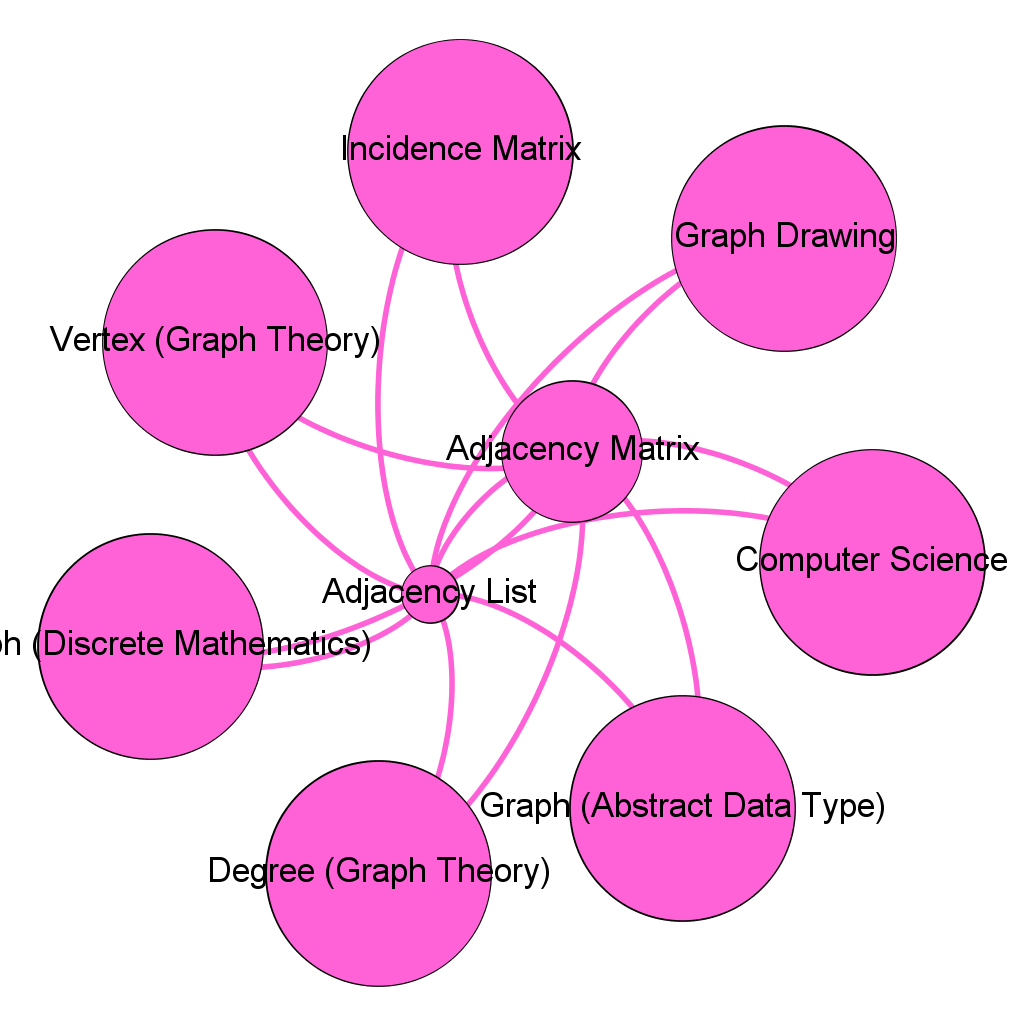

## My own test case
### Using as a SEED Wikipedia's "Digital Humanities"

In [29]:
from operator import itemgetter
import networkx as nx
import wikipedia

SEED = "Digital Humanities".title()

STOPS = ("International Standard Serial Number",
         "International Standard Book Number",
         "National Diet Library",
         "International Standard Book Number (Identifier)", 
         "Pubmed Identifier", "Pubmed Central",
         "Digital Object Identifier", 
         "Arxiv", 
         "Proc Natl Acad Sci Usa", 
         "Bibcode", 
         "Library of Congress Control Number", 
         "Jstor",
         "Digital Humanities Quarterly", # added for DH
         "Literary and Linguistic Computing") # added for DH
# I want to ignore the hyperlinks to these to avoid starclusters in the network

todo_lst = [(0, SEED)] # the SEED is in the layer 0
todo_set = set(SEED) # the SEED itself
done_set = set() # nothing is done yet

F = nx.DiGraph()
layer, page = todo_lst[0]

while layer < 2:
    del todo_lst[0]
    done_set.add(page)
    print(layer, page) # show progress
    try:
        wiki = wikipedia.page(page)
    except:
        layer, page = todo_lst[0]
        print("Could not load", page)
        continue
    for link in wiki.links:
        link = link.title()
        if link not in STOPS and not link.startswith("List Of"):
            if link not in todo_set and link not in done_set:
                todo_lst.append((layer + 1, link))
                todo_set.add(link)
            F.add_edge(page, link)
            layer, page = todo_lst[0]
        print("{} nodes, {} edges".format(len(F), nx.number_of_edges(F))) # 209 nodes, 217 edges

0 Digital Humanities
2 nodes, 1 edges
3 nodes, 2 edges
4 nodes, 3 edges
5 nodes, 4 edges
6 nodes, 5 edges
7 nodes, 6 edges
8 nodes, 7 edges
9 nodes, 8 edges
10 nodes, 9 edges
11 nodes, 10 edges
12 nodes, 11 edges
13 nodes, 12 edges
14 nodes, 13 edges
15 nodes, 14 edges
16 nodes, 15 edges
17 nodes, 16 edges
18 nodes, 17 edges
19 nodes, 18 edges
20 nodes, 19 edges
21 nodes, 20 edges
22 nodes, 21 edges
23 nodes, 22 edges
24 nodes, 23 edges
25 nodes, 24 edges
26 nodes, 25 edges
27 nodes, 26 edges
28 nodes, 27 edges
29 nodes, 28 edges
30 nodes, 29 edges
31 nodes, 30 edges
32 nodes, 31 edges
33 nodes, 32 edges
34 nodes, 33 edges
35 nodes, 34 edges
36 nodes, 35 edges
37 nodes, 36 edges
38 nodes, 37 edges
39 nodes, 38 edges
40 nodes, 39 edges
41 nodes, 40 edges
42 nodes, 41 edges
42 nodes, 42 edges
42 nodes, 42 edges
43 nodes, 43 edges
44 nodes, 44 edges
45 nodes, 45 edges
46 nodes, 46 edges
47 nodes, 47 edges
48 nodes, 48 edges
49 nodes, 49 edges
50 nodes, 50 edges
51 nodes, 51 edges
52 nodes

In [30]:
F.remove_edges_from(F.selfloop_edges())
duplicates = [(node, node + "s") for node in F if node + "s" in F]
for dup in duplicates:
    F = nx.contracted_nodes(F, *dup, self_loops=False)
duplicates = [(x, y) for x, y in [(node, node.replace("-", " ")) for node in F] if x != y and y in F]
for dup in duplicates:
    F = nx.contracted_nodes(F, *dup, self_loops=False)
    nx.set_node_attributes(F, "contraction", 0)

In [31]:
nx.write_graphml(F, "wikidh.graphml")

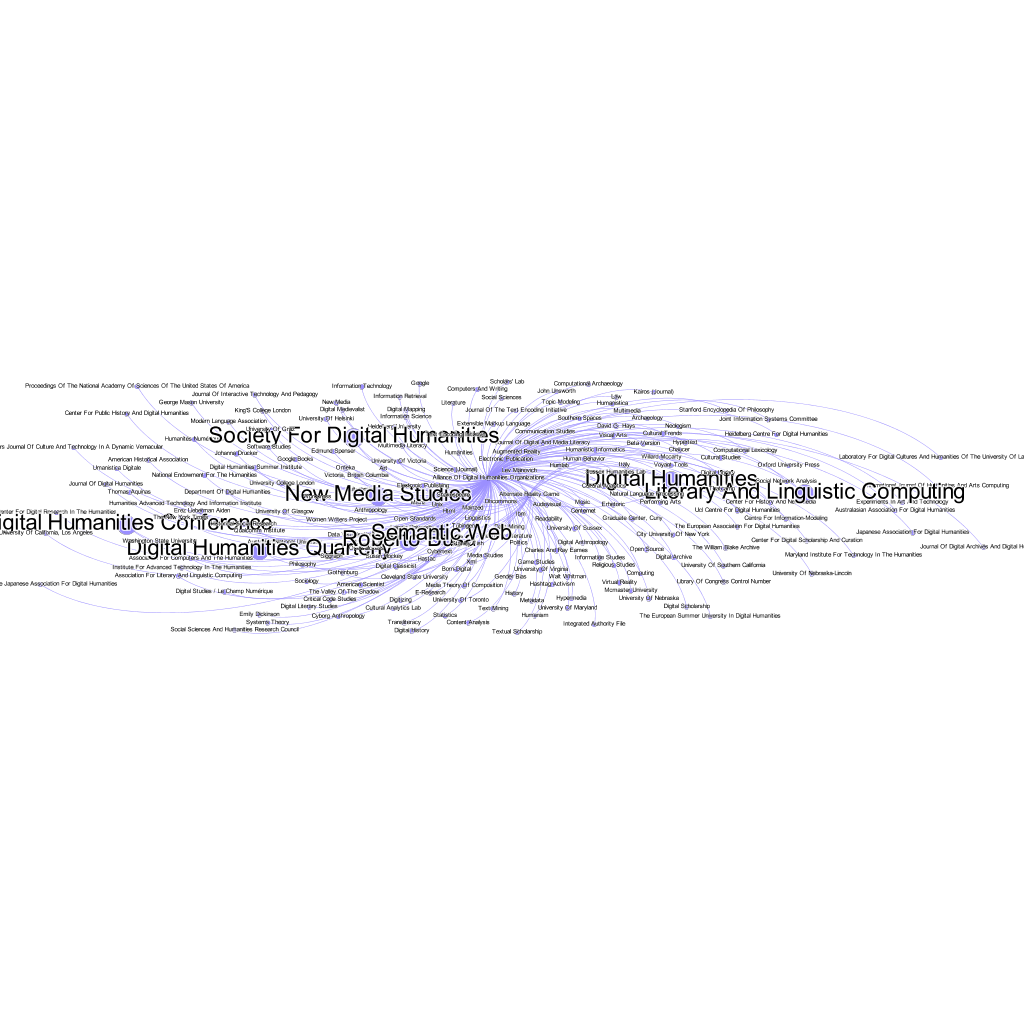

Alas, it worked with my custom SEED ("Digital Humanities")!
However, I think I have to amend my STOPS, because "Digital Humanities Quarterly", "Literary and Linguistic Computing" are relatively big (and sure, they get the majority of directed hyperlinks.
Looking at this purely exploratory, I want to investigate "Society for Digital Humanities" and "Digital Humanities Conference" closer to see, what exactly they are about and if they should go on the STOPS list as well.
I will try out the code above for a couple of other SEED articles and find out what I get.

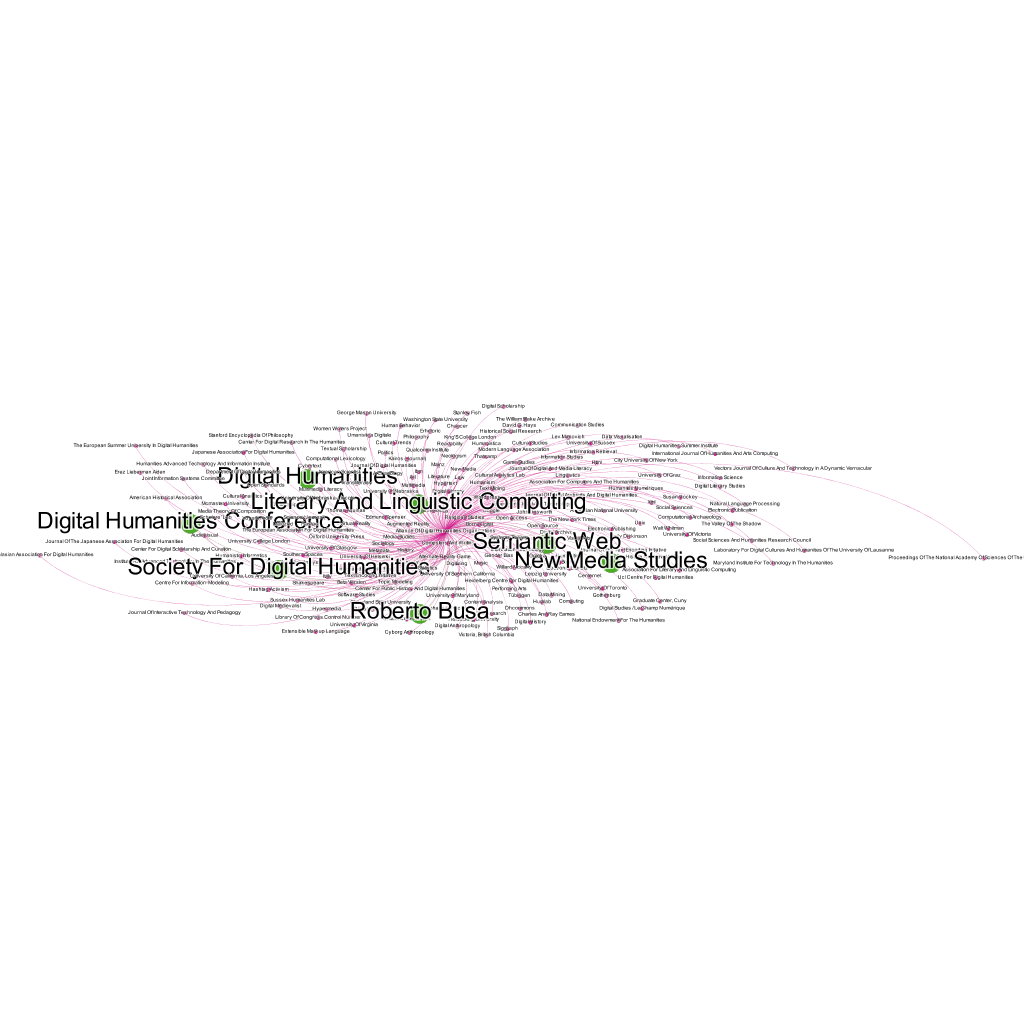